#  An analysis of the world university rankings and their methodologies.

The analysis is based on 2 major university ranking practice. (1) The Times Higher Education World Ranking (2) The Academic Ranking of World Universities (Shanghai Ranking). Initially, both the rankings will be analysed and compared on the basis of unbaised methodology. And then the latter will be used to predict the rankings.

Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import plotly as py
import plotly.express as px
from wordcloud import WordCloud
import statsmodels.api as sm
from scipy import stats

Importing the "The Times Higher Education World Ranking" (THE) dataset. Link: https://www.timeshighereducation.com/news/ranking-methodology-2016 
It has 5 major performance indicators:

(1) Teaching (the learning environment)
(2) Research (volume, income and reputation)
(3) Citations (research influence)
(4) International outlook (staff, students and research)
(5) Industry income (knowledge transfer).

In [2]:
times_df= pd.read_csv('timesData.csv')
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


Looking for unusual values in performance indicator columns.

In [3]:
times_df['income'].unique()

array(['34.5', '83.7', '87.5', '64.3', '-', '57.0', '73.5', '92.9',
       '100.0', '34.7', '59.6', '43.7', '53.7', '56.5', '39.0', '32.8',
       '95.1', '89.8', '42.6', '50.2', '51.8', '40.5', '47.7', '98.6',
       '42.2', '64.1', '30.7', '73.3', '31.7', '29.2', '38.0', '30.3',
       '84.2', '48.0', '53.9', '67.1', '97.8', '29.6', '40.4', '37.9',
       '36.2', '90.8', '52.7', '31.6', '44.1', '29.1', '57.1', '39.1',
       '33.9', '38.4', '30.5', '33.2', '37.7', '43.8', '45.8', '26.1',
       '30.2', '32.6', '44.0', '43.0', '26.7', '32.4', '60.5', '99.8',
       '35.7', '32.7', '97.7', '43.4', '38.9', '95.5', '97.1', '28.8',
       '44.5', '61.0', '73.4', '27.4', '82.3', '79.8', '41.5', '42.5',
       '40.3', '81.4', '26.4', '49.3', '30.0', '55.3', '61.1', '34.8',
       '36.0', '39.5', '57.2', '47.0', '99.4', '31.1', '60.0', '40.0',
       '49.6', '50.1', '37.5', '38.8', '40.6', '61.5', '38.3', '34.2',
       '41.2', '41.6', '29.7', '27.8', '40.8', '29.4', '98.7', '56.6',
       '

In [4]:
times_df['international'].unique()

array(['72.4', '54.6', '82.3', '29.5', '70.3', '77.7', '77.2', '39.6',
       '90.0', '59.2', '48.1', '62.8', '58.5', '62.4', '93.7', '53.3',
       '-', '90.9', '32.9', '39.1', '91.4', '90.8', '49.0', '49.4',
       '60.5', '18.4', '73.2', '32.6', '64.3', '93.3', '21.5', '31.6',
       '55.9', '97.8', '85.9', '88.0', '68.6', '56.4', '77.9', '67.3',
       '97.4', '44.9', '93.9', '44.5', '43.7', '31.2', '100.0', '66.3',
       '22.1', '23.0', '28.3', '22.6', '43.0', '38.1', '31.8', '52.3',
       '43.1', '35.6', '25.2', '56.5', '64.0', '31.7', '67.2', '16.7',
       '89.6', '42.2', '87.5', '20.9', '84.2', '52.2', '36.7', '72.8',
       '74.2', '66.6', '63.4', '22.5', '65.7', '99.5', '79.1', '92.9',
       '56.8', '69.0', '87.9', '24.4', '87.0', '21.9', '91.3', '35.4',
       '31.0', '37.6', '85.3', '24.2', '85.7', '48.0', '26.8', '62.6',
       '34.1', '83.3', '19.9', '71.8', '47.7', '24.8', '29.2', '34.2',
       '63.0', '95.7', '29.6', '50.2', '91.0', '30.4', '24.7', '73.8',
       '

Two columns - income & international have '-' and 'nan' values. These will be replaced with NaN.

In [5]:
times_df['income'] = times_df['income'].replace('-', np.NaN)
times_df['income'] = times_df['income'].replace('nan', np.NaN)
times_df['international'] = times_df['international'].replace('-', np.NaN)
times_df['international'] = times_df['international'].replace('nan', np.NaN)
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,"7,929",8.4,27%,45 : 55,2011


Checking the data types and then converting the required column's data types into float.

In [6]:
times_df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [7]:
times_df['international'] = pd.to_numeric(times_df['international'],errors = 'coerce')
times_df['income'] = pd.to_numeric(times_df['income'],errors = 'coerce')

In [8]:
times_df.dtypes # Rechecking if they have successfully converted or not

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

After rank 200, all the rankings in THE are in range. This will cause issue while manipulating or predicting the data using the world rank column. So, I decided to create a dataframe without those range ranks.

In [9]:
times_df['world_rank'].unique() # checking if the column has unusual data

array(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '109', '111', '112', '114', '115', '117', '118', '119',
       '120', '122', '124', '127', '128', '129', '130', '132', '135',
       '136', '137', '138', '139', '140', '142', '143', '144', '145',
       '147', '149', '151', '152', '155', '156', '158', '159', '161',
       '163', '164', '165', '167', '168', '170', '171', '172', '173',
       '174', '177', '178', '181', '182', '183', '184', '185', '186

In [10]:
times_df['world_rank'] = times_df['world_rank'].str.replace('=','') # Removing '=' from the ranks

In [11]:
times_df['world_rank'].unique() # Rechecking if it successfully got removed

array(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '109', '111', '112', '114', '115', '117', '118', '119',
       '120', '122', '124', '127', '128', '129', '130', '132', '135',
       '136', '137', '138', '139', '140', '142', '143', '144', '145',
       '147', '149', '151', '152', '155', '156', '158', '159', '161',
       '163', '164', '165', '167', '168', '170', '171', '172', '173',
       '174', '177', '178', '181', '182', '183', '184', '185', '186

In [12]:
temp = times_df['world_rank'].str.split('-', n = 1, expand = True) # Spliting the ranks

In [13]:
# The ranks are split and assigned to world_rank1 and world_rank2 column
times_df['world_rank1'] = temp[0].fillna(-1).astype(int) 
times_df['world_rank2'] = temp[1].fillna(-1).astype(int)
times_df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,world_rank1,world_rank2
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011,1,-1
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011,2,-1
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011,3,-1
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011,4,-1
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,"7,929",8.4,27%,45 : 55,2011,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016,601,800
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016,601,800
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016,601,800
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016,601,800


In [14]:
times_df200 = times_df.drop(times_df[(times_df['world_rank1']) > 200].index) 
# Subsetting the data and removing all the range values
times_df200.tail() # from 201 to end.

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,world_rank1,world_rank2
1998,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,"20,174",15.2,29%,50 : 50,2016,196,-1
1999,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,"2,958",13.4,17%,61 : 39,2016,196,-1
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,"16,841",43.2,8%,51 : 49,2016,198,-1
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,"27,756",14.8,17%,63 : 37,2016,199,-1
2002,200,Queen’s University Belfast,United Kingdom,34.1,93.4,33.3,68.9,35.7,48.8,"17,940",17.9,30%,54 : 46,2016,200,-1


In [15]:
times_df100 = times_df.drop(times_df[(times_df['world_rank1']) > 100].index) # Subsetting the top 100 ranks
times_df100.tail() 

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,world_rank1,world_rank2
1898,94,McMaster University,Canada,39.8,76.1,44.8,84.9,88.0,58.8,"23,823",19.3,15%,53 : 47,2016,94,-1
1899,97,University of Sheffield,United Kingdom,42.4,81.9,48.8,80.1,43.4,58.6,"23,311",15.5,31%,50 : 50,2016,97,-1
1900,98,Queen Mary University of London,United Kingdom,34.1,93.5,41.3,93.3,36.8,58.5,"14,260",14.0,40%,52 : 48,2016,98,-1
1901,99,University of Göttingen,Germany,49.3,56.4,54.5,72.7,31.8,58.0,"25,581",25.6,12%,51 : 49,2016,99,-1
1902,99,Michigan State University,United States of America,47.3,56.4,52.6,76.8,32.2,58.0,"44,750",15.7,15%,51 : 49,2016,99,-1


In [16]:
times_df10 = times_df.drop(times_df[(times_df['world_rank1']) > 10].index) # Subsetting the top 10 ranks

Importing the "The Academic Ranking of World Universities, also known as the Shanghai Ranking" dataset. All the measuring columns are in terms of scores. Below is the description of all the columns. Reference: http://www.shanghairanking.com/methodology/arwu/2021 . It has 6 major performance indicators:

Alumni - Alumni of an institution winning Nobel Prizes and Fields Medals

Award - Staff of an institution winning Nobel Prizes and Fields Medals

HiCi - Highly Cited Researchers

N&S - Papers published in Nature and Science

PUB - Papers indexed in Science Citation Index-Expanded and Social Science Citation Index

PCP - Per capita academic performance of an institution

In [17]:
Shang_df= pd.read_csv('shanghaiData.csv')
Shang_df

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...
4892,401-500,University of Trieste,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015
4893,401-500,University of Zaragoza,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015
4894,401-500,Utah State University,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015
4895,401-500,Vienna University of Technology,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015


In [18]:
Shang_df['university_name'] = Shang_df['university_name'].replace("University of California, Berkeley",
                                                                  "University of California-Berkeley")

In [19]:
Shang_df.head(20)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,University of California-Berkeley,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
5,6,California Institute of Technology,5,67.1,59.2,68.6,59.8,65.8,52.5,100.0,2005
6,7,Columbia University,6,62.3,79.4,60.6,56.1,54.2,69.5,45.4,2005
7,8,Princeton University,7,60.9,63.4,76.8,60.9,48.7,48.5,59.1,2005
8,9,University of Chicago,8,60.1,75.6,81.9,50.3,44.7,56.4,42.2,2005
9,10,University of Oxford,2,59.7,64.3,59.1,48.4,55.6,68.4,53.2,2005


In [20]:
Shang_df.dtypes # Checking the data types of the columns

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object

Similarly removing the ranges from the world rank column.

In [21]:
Shang_df['world_rank'].unique() # Ranges start from 101

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '34', '35',
       '36', '37', '38', '39', '41', '43', '45', '46', '47', '50', '51',
       '52', '53', '54', '55', '56', '57', '60', '61', '62', '63', '64',
       '65', '67', '69', '71', '72', '73', '75', '76', '77', '78', '80',
       '82', '83', '84', '85', '86', '87', '89', '90', '92', '93', '97',
       '98', '99', '100', '101-152', '153-202', '203-300', '301-400',
       '401-500', '33', '40', '42', '44', '48', '58', '59', '66', '68',
       '70', '74', '79', '81', '88', '94', '95', '96', '102-150',
       '151-200', '201-300', '49', '91', '151-202', '203-304', '305-402',
       '403-510', '101-151', '152-200', '201-302', '303-401', '402-503',
       '402-501', '101-150'], dtype=object)

In [22]:
temp1 = Shang_df['world_rank'].str.split('-', n = 1, expand = True) 
# Spliting the ranks and assigning to world_rank1 and world_rank2
Shang_df['world_rank1'] = temp1[0].fillna(-1).astype(int)
Shang_df['world_rank2'] = temp1[1].fillna(-1).astype(int)
Shang_df.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,world_rank1,world_rank2
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,1,-1
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,2,-1
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,3,-1
3,4,University of California-Berkeley,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,4,-1
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,5,-1


In [23]:
Shang_df100 = Shang_df.drop(Shang_df[(Shang_df['world_rank1']) > 100].index) 
Shang_df100.tail()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,world_rank1,world_rank2
4492,96,McMaster University,4,24.4,12.6,18.8,23.2,15.1,44.5,22.5,2015,96,-1
4493,97,University of Bonn,4,24.3,15.4,19.8,17.4,21.1,39.8,25.9,2015,97,-1
4494,98,VU University Amsterdam,4,24.2,0.0,0.0,27.8,18.0,55.5,33.3,2015,98,-1
4495,99,Michigan State University,50,24.0,8.9,0.0,30.7,21.8,50.6,18.9,2015,99,-1
4496,100,Texas A&M University,51,23.9,0.0,0.0,34.3,22.7,49.5,20.9,2015,100,-1


### Q1.a. Which countries have been dominating the university ranking system?

Since, Shanghai ranking dataset doesn't have country column, only THE rankings are used to analyze.

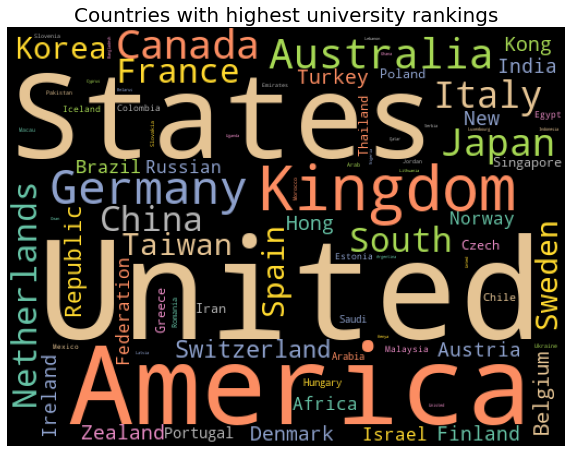

In [24]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='black', colormap='Set2', 
                      collocations=False,  width=512, height=384 ).generate(" ".join(times_df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Countries with highest university rankings', fontsize=20)
plt.show()

Looks like USA, UK,Australia, etc are dominating the ranking system. But to get a better understanding, a bar plot is used.

<AxesSubplot:xlabel='count', ylabel='country'>

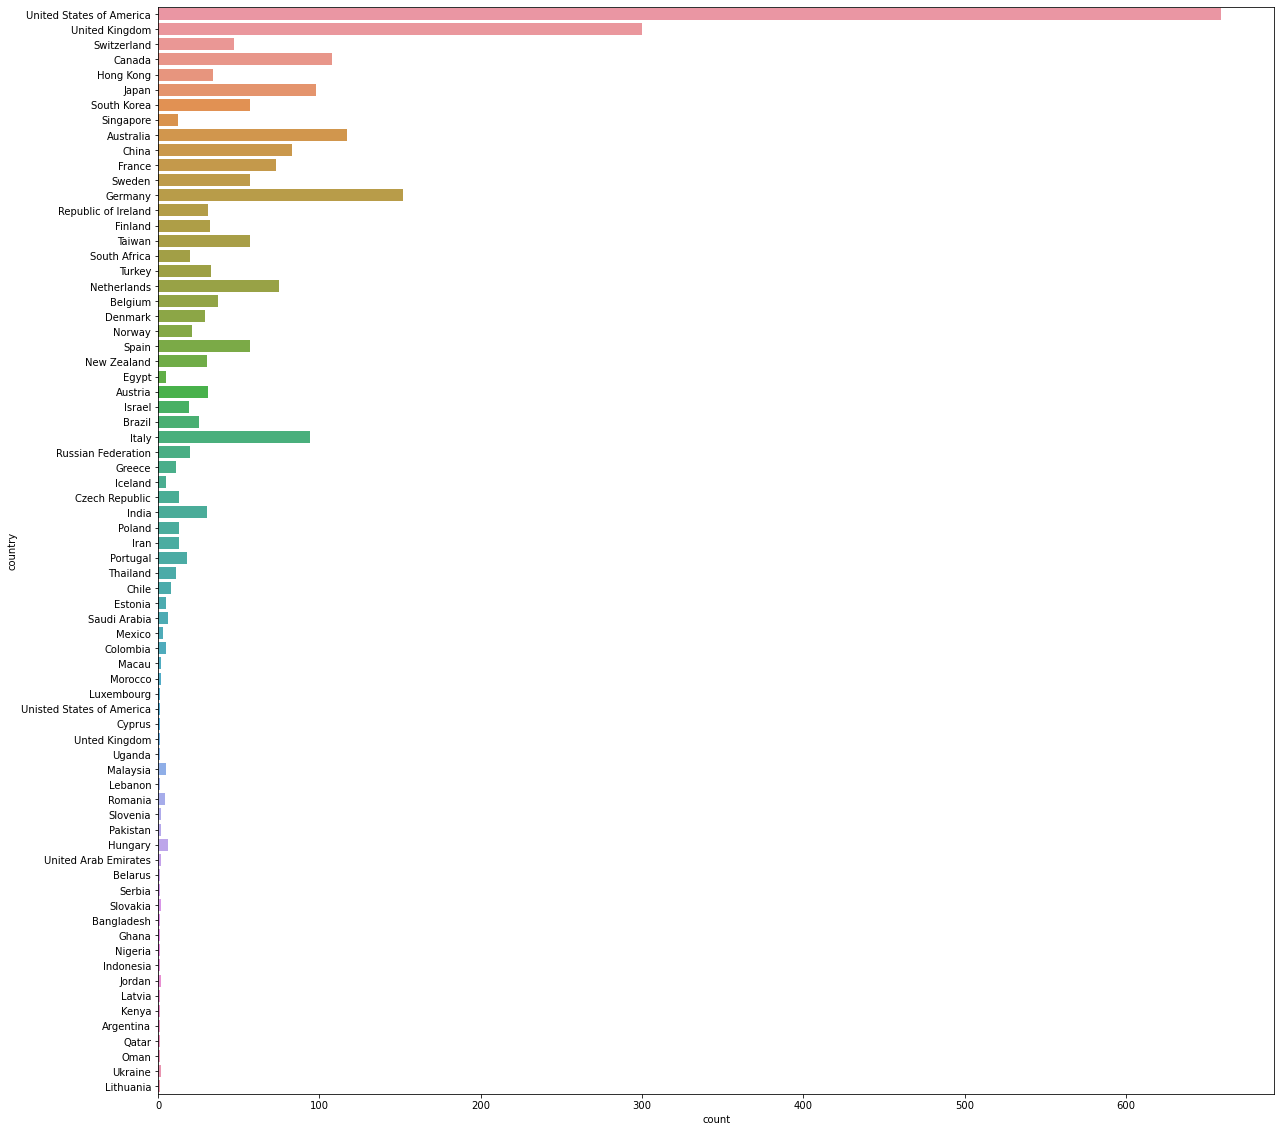

In [25]:
plt.figure(figsize=(20,20))
sns.countplot(data = times_df, y = 'country') # count plot to visualize the total number of universities in each country

<AxesSubplot:>

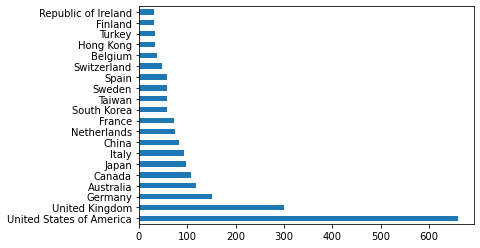

In [26]:
times_df['country'].value_counts()[:20].plot(kind='barh') # Top 20 countries are picked.
# Visualizing top 20 countries leading in the ranking system

<AxesSubplot:>

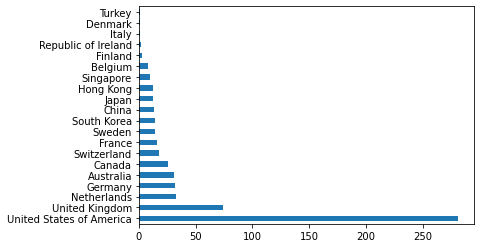

In [27]:
times_df100['country'].value_counts()[:20].plot(kind='barh') # Top 20 countries are picked.
# Visualizing top 20 countries leading in the top 100 ranking system

<AxesSubplot:>

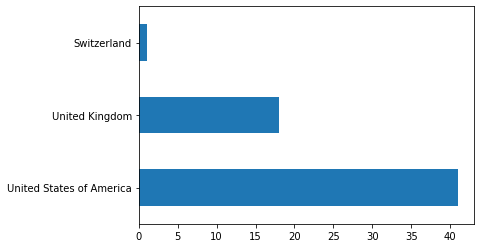

In [28]:
times_df10['country'].value_counts()[:10].plot(kind='barh') # Top 10 countries are picked.
# Visualizing top 20 countries leading in the top 10 ranking system

From the above analysis it can be seen that USA has been consistingly dominating this ranking system followed by UK. However, in top 10 only 3 countries could make their place.

### Q1. b. Which universities are dominating the ranking system?

Both the datasets' subsets are created on the basis of year and ranks to compare both the rankings on same parameters.

In [29]:
times_dfFive = times_df100[times_df100['world_rank1']< 6]
times_df5 = times_dfFive[times_dfFive['year']!= 2016]#Subsetting the top 5 ranks in THE rankings.
times_df5.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,world_rank1,world_rank2
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011,1,-1
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011,2,-1
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011,3,-1
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011,4,-1
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,"7,929",8.4,27%,45 : 55,2011,5,-1


In [30]:
Shang_dfFive = Shang_df100[Shang_df100['world_rank1']< 6] #Subsetting the top 5 ranks in Shanghai rankings.
Shang_df5 = Shang_dfFive[Shang_dfFive['year'] > 2010] 
Shang_df5.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,world_rank1,world_rank2
3014,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,2011,1,-1
3015,2,Stanford University,2,72.6,41.2,78.4,88.4,70.2,70.3,48.6,2011,2,-1
3016,3,Massachusetts Institute of Technology (MIT),3,72.0,72.8,81.9,67.9,70.6,60.6,63.7,2011,3,-1
3017,4,University of California-Berkeley,4,71.9,68.3,79.3,70.0,69.5,69.4,53.1,2011,4,-1
3018,5,University of Cambridge,1,70.0,87.1,96.7,54.5,54.1,65.1,52.0,2011,5,-1


(6.0, 0.5)

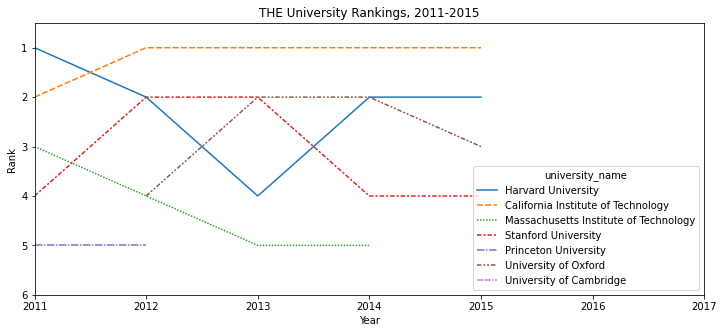

In [31]:
plt.figure(figsize=(12,5))
sns.lineplot(data=times_df5, x='year', y='world_rank1', style='university_name', hue ='university_name' )
# Line plot of top 5 countries over the years
plt.title('THE University Rankings, 2011-2015')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.xlim(2011, 2017)
plt.ylim(6,0.5)

(6.0, 0.5)

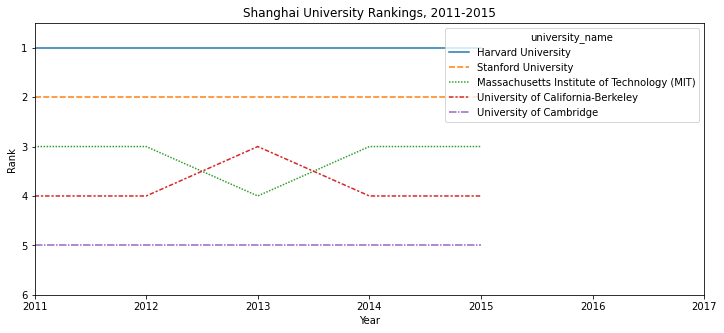

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(data=Shang_df5, x='year', y='world_rank1', style='university_name', hue ='university_name' )
# Line plot of top 5 countries over the years
plt.title('Shanghai University Rankings, 2011-2015')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.xlim(2011, 2017)
plt.ylim(6,0.5)

From the two graphs, it is quite clear that the rankings in Shanghai ranking system is consistent compared to THE ranking which arises a question if the Shanghai ranking system is biased towards any certain performance indicators.

Harvard University and Stanford University have been performing well in both the ranking system. Hence, we can look into the components of both the ranking system to analyze the reason behind their consistency.

#### Harvard University

Merging both the datasets in one, to compare all the performance indicators together over the years.

In [33]:
RankingMerged = pd.merge(Shang_df100, times_df100, on=['university_name','year'], how='inner') 
# Merging both the dataframes of top 100 ranking
Harvard_df = RankingMerged[RankingMerged['university_name'] == 'Harvard University'] # Selecting Harvard University
Harvard_df

,world_rank_x,university_name,national_rank,total_score_x,alumni,award,hici,ns,pub,pcp,...,research,citations,income,total_score_y,num_students,student_staff_ratio,international_students,female_male_ratio,world_rank1_y,world_rank2_y
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,...,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,1,-1
46,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,71.1,...,97.4,99.8,35.9,93.9,"20,152",8.9,25%,NaN,2,-1
96,1,Harvard University,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.5,...,98.6,99.2,39.9,93.6,"20,152",8.9,25%,NaN,4,-1
143,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,75.3,...,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2,-1
190,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,76.6,...,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2,-1


In [34]:
Harvard_dfT = Harvard_df.T # Transposing the dataframe
Harvard_dfT

,0,46,96,143,190
world_rank_x,1,1,1,1,1
university_name,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University
national_rank,1,1,1.0,1,1
total_score_x,100.0,100.0,100.0,100.0,100.0
alumni,100.0,100.0,100.0,100.0,100.0
award,100.0,100.0,100.0,100.0,100.0
hici,100.0,100.0,100.0,100.0,100.0
ns,100.0,100.0,100.0,100.0,100.0
pub,100.0,100.0,100.0,100.0,100.0
pcp,70.5,71.1,72.5,75.3,76.6


In [35]:
Harvard_dfT.reset_index(level=0, inplace=True) # Assinging default indexes
Harvard_dfT

,index,0,46,96,143,190
0,world_rank_x,1,1,1,1,1
1,university_name,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University
2,national_rank,1,1,1.0,1,1
3,total_score_x,100.0,100.0,100.0,100.0,100.0
4,alumni,100.0,100.0,100.0,100.0,100.0
5,award,100.0,100.0,100.0,100.0,100.0
6,hici,100.0,100.0,100.0,100.0,100.0
7,ns,100.0,100.0,100.0,100.0,100.0
8,pub,100.0,100.0,100.0,100.0,100.0
9,pcp,70.5,71.1,72.5,75.3,76.6


In [36]:
Harvard_dfT.columns = ['Performance Indicators','Year2011','Year2012', 'Year2013','Year2014','Year2015'] 
# assigning column names
Harvard_Unidf = Harvard_dfT.drop(labels = [0, 1, 2, 3, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 25, 26], axis = 0)
Harvard_Unidf

,Performance Indicators,Year2011,Year2012,Year2013,Year2014,Year2015
4,alumni,100.0,100.0,100.0,100.0,100.0
5,award,100.0,100.0,100.0,100.0,100.0
6,hici,100.0,100.0,100.0,100.0,100.0
7,ns,100.0,100.0,100.0,100.0,100.0
8,pub,100.0,100.0,100.0,100.0,100.0
9,pcp,70.5,71.1,72.5,75.3,76.6
15,teaching,99.7,95.8,94.9,95.3,92.9
16,international,72.4,67.5,63.7,66.2,67.6
17,research,98.7,97.4,98.6,98.5,98.6
18,citations,98.8,99.8,99.2,99.1,98.9


In [37]:
Harvard_Unidf.dtypes # checking the data types of the rows.

Performance Indicators    object
Year2011                  object
Year2012                  object
Year2013                  object
Year2014                  object
Year2015                  object
dtype: object

In [38]:
# converting the data types to float
Harvard_Unidf['Year2011'] = pd.to_numeric(Harvard_Unidf['Year2011'],errors = 'coerce') 
Harvard_Unidf['Year2012'] = pd.to_numeric(Harvard_Unidf['Year2012'],errors = 'coerce')
Harvard_Unidf['Year2013'] = pd.to_numeric(Harvard_Unidf['Year2013'],errors = 'coerce')
Harvard_Unidf['Year2014'] = pd.to_numeric(Harvard_Unidf['Year2014'],errors = 'coerce')
Harvard_Unidf['Year2015'] = pd.to_numeric(Harvard_Unidf['Year2015'],errors = 'coerce')
Harvard_Unidf.dtypes 

Performance Indicators     object
Year2011                  float64
Year2012                  float64
Year2013                  float64
Year2014                  float64
Year2015                  float64
dtype: object

<AxesSubplot:xlabel='Performance Indicators'>

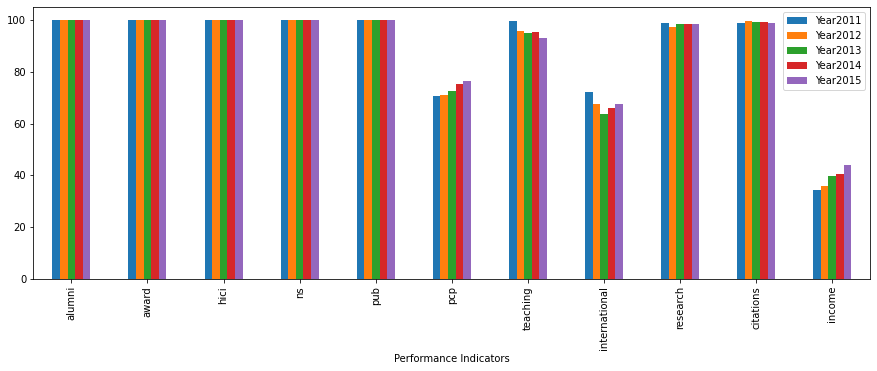

In [39]:
Harvard_Unidf.plot(x="Performance Indicators", 
                   y=["Year2011","Year2012", "Year2013","Year2014","Year2015"], kind="bar", figsize=(15, 5))

Harvard University has been doing really well in terms of research and citation. Hence, It has topped consistenly in Shanghai Ranking system. And it was able to mark it's place in top 5 in THE ranking system as well.

### Stanford University

Similarly, analyzing the performance indicators of Stanford University as well.

In [40]:
Stanford_df = RankingMerged[RankingMerged['university_name'] == 'Stanford University']
Stanford_dfT = Stanford_df.T
Stanford_dfT.reset_index(level=0, inplace=True)
Stanford_dfT

,index,1,47,97,144,191
0,world_rank_x,2,2,2,2,2
1,university_name,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University
2,national_rank,2,2,2.0,2,2
3,total_score_x,72.6,72.8,72.6,72.1,73.3
4,alumni,41.2,38.0,40.0,41.8,40.7
5,award,78.4,79.7,80.7,82.8,89.6
6,hici,88.4,88.9,88.9,79.8,80.1
7,ns,70.2,71.6,68.7,71.1,70.1
8,pub,70.3,69.6,69.4,70.9,70.6
9,pcp,48.6,49.2,50.4,51.9,53.8


In [41]:
Stanford_dfT.columns = ['Performance Indicators','Year2011','Year2012', 'Year2013','Year2014','Year2015']
Stanford_Unidf = Stanford_dfT.drop(labels = [0, 1, 2, 3, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 25, 26], axis = 0)
Stanford_Unidf.dtypes

Performance Indicators    object
Year2011                  object
Year2012                  object
Year2013                  object
Year2014                  object
Year2015                  object
dtype: object

In [42]:
# converting the data types to float
Stanford_Unidf['Year2011'] = pd.to_numeric(Stanford_Unidf['Year2011'],errors = 'coerce') 
Stanford_Unidf['Year2012'] = pd.to_numeric(Stanford_Unidf['Year2012'],errors = 'coerce')
Stanford_Unidf['Year2013'] = pd.to_numeric(Stanford_Unidf['Year2013'],errors = 'coerce')
Stanford_Unidf['Year2014'] = pd.to_numeric(Stanford_Unidf['Year2014'],errors = 'coerce')
Stanford_Unidf['Year2015'] = pd.to_numeric(Stanford_Unidf['Year2015'],errors = 'coerce')
Stanford_Unidf.dtypes

Performance Indicators     object
Year2011                  float64
Year2012                  float64
Year2013                  float64
Year2014                  float64
Year2015                  float64
dtype: object

<AxesSubplot:xlabel='Performance Indicators'>

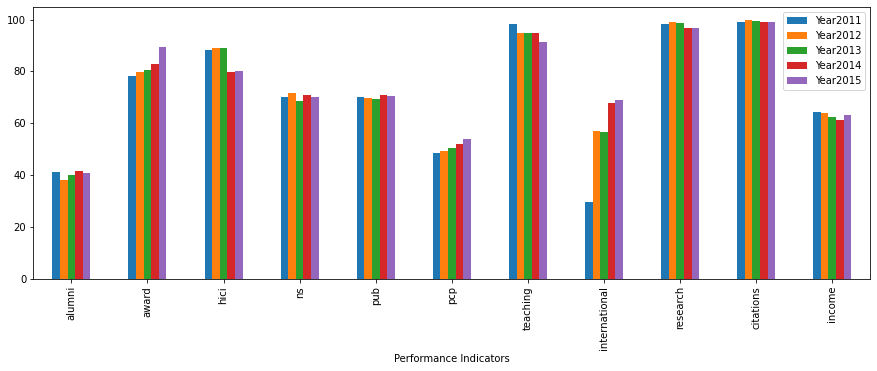

In [43]:
Stanford_Unidf.plot(x="Performance Indicators", 
                    y=["Year2011","Year2012", "Year2013","Year2014","Year2015"], kind="bar", figsize=(15, 5))

Visually, it is can be deduced that the research and citation component of Shanghai ranking system and THE ranking system are measured differently as Stanford has been doing well in THE ranking system in terms of citation and research but not so good in Shanghai ranking system.

Futhermore, we will head towards analyzing research and citation components to get a better insight.

### Q2. Are there any certain components majorly influencing the ranking systems?

Handling missing values of Shanghai Ranking dataframe

In [44]:
Null_cell1 = Shang_df100.isnull().sum() # Looking for null values
Null_cell1

world_rank         0
university_name    1
national_rank      1
total_score        1
alumni             1
award              1
hici               1
ns                 1
pub                1
pcp                1
year               0
world_rank1        0
world_rank2        0
dtype: int64

In [45]:
Shang_df100 = Shang_df100.replace('', np.nan) # Filling the missing values with nan

In [46]:
nan_values = Shang_df100[Shang_df100.isna().any(axis=1)] 
# source code - https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
nan_values # Identifying the row

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,world_rank1,world_rank2
3896,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,99,-1


In [47]:
Shang_df_100 = Shang_df100.drop(labels = [3896], axis = 0) # Dropping the row with null values

In [48]:
Null_cell2 = Shang_df_100.isnull().sum() # rechecking the null values
Null_cell2

world_rank         0
university_name    0
national_rank      0
total_score        0
alumni             0
award              0
hici               0
ns                 0
pub                0
pcp                0
year               0
world_rank1        0
world_rank2        0
dtype: int64

Handling missing values of THE Ranking dataframe

In [49]:
Null_cellt = times_df200.isnull().sum() # looking for null values
Null_cellt

world_rank                  0
university_name             0
country                     0
teaching                    0
international               9
research                    0
citations                   0
income                    140
total_score                 0
num_students               19
student_staff_ratio        19
international_students     20
female_male_ratio         123
year                        0
world_rank1                 0
world_rank2                 0
dtype: int64

In [50]:
times_df200.dtypes # The important columns are teaching, international, research, citations and income.
# Out of which only income and international have missing values.

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
world_rank1                 int32
world_rank2                 int32
dtype: object

Checking if mean or median would be a better way to impute the missing values.

Text(0.5, 1.0, 'Imputed with the median')

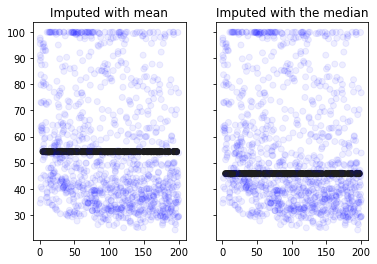

In [51]:
Income0 = times_df200['income'].fillna(times_df200['income'].mean()) # source code - Lab assignment feedback
WorldRank = times_df200['world_rank1']
IncomeMeddian = times_df200['income'].fillna(times_df200['income'].median())

# This step will identify rows with atleast one NaN values
atLeastOneNaN = times_df200['income'].isnull() | times_df200['world_rank1'].isnull()

# Specifing black for imputed values
colourPalette = {True: '#1E1E1E', False: '#0000ff11'}
colours = atLeastOneNaN.map(colourPalette)

#Subplots of one row and two columns, which share a y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# imputing with mean values
ax1.scatter(WorldRank, Income0, c=colours)
ax1.set_title('Imputed with mean')
# imputing with median values
ax2.scatter(WorldRank, IncomeMeddian, c=colours)
ax2.set_title('Imputed with the median')

In the aboce case, median is better than mean as median wouldn't disturb the distribution as mean would.

Imputing the income column with median.

In [52]:
times_df200['income'] = times_df200['income'].fillna(times_df200['income'].median()) 
# imputing the missing values with median

Text(0.5, 1.0, 'Imputed with the median')

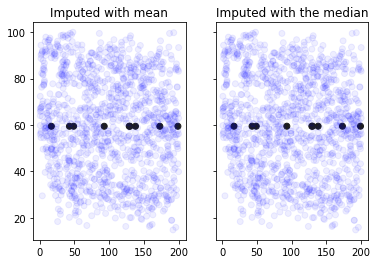

In [53]:
InternationalM = times_df200['international'].fillna(times_df200['international'].mean())
WorldRank1 = times_df200['world_rank1']
InternationalMeddian = times_df200['international'].fillna(times_df200['international'].median())

# This step will identify rows with atleast one NaN values
atLeastOneNaN1 = times_df200['international'].isnull() | times_df200['world_rank1'].isnull()

# Specifing black for imputed values
colourPalette1 = {True: '#1E1E1E', False: '#0000ff11'}
colours1 = atLeastOneNaN1.map(colourPalette1)

#Subplots of one row and two columns, which share a y-axis
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# imputing with mean values
ax1.scatter(WorldRank1, InternationalM, c=colours1)
ax1.set_title('Imputed with mean')
# imputing with median values
ax2.scatter(WorldRank1, InternationalMeddian, c=colours1)
ax2.set_title('Imputed with the median')

In the above case both mean and median are in the same place.

In [54]:
times_df200['international'] = times_df200['international'].fillna(times_df200['international'].median())
# imputing the missing values with median

All the missing values are handled with meadian.

Analyzing the research and citation components in Shanghai ranking system.

In [55]:
Shang_df100.drop('world_rank2', axis=1, inplace=True)

In [56]:
Shang_df100.drop('total_score', axis=1, inplace=True)

In [57]:
Shang_df100.drop('national_rank', axis=1, inplace=True)

In [58]:
Shang_df100.drop('university_name', axis=1, inplace=True)

In [59]:
Shang_df100.drop('world_rank', axis=1, inplace=True)

In [60]:
Shang_df100.drop('year', axis=1, inplace=True)

Dropped all the unnecessary columns above to proceed with pairwise plot and correlation

In [61]:
Shang_df100

,alumni,award,hici,ns,pub,pcp,world_rank1
0,100.0,100.0,100.0,100.0,100.0,72.4,1
1,99.8,93.4,53.3,56.6,70.9,66.9,2
2,41.1,72.2,88.5,70.9,72.3,65.0,3
3,71.8,76.0,69.4,73.9,72.2,52.7,4
4,74.0,80.6,66.7,65.8,64.3,53.0,5
...,...,...,...,...,...,...,...
4492,12.6,18.8,23.2,15.1,44.5,22.5,96
4493,15.4,19.8,17.4,21.1,39.8,25.9,97
4494,0.0,0.0,27.8,18.0,55.5,33.3,98
4495,8.9,0.0,30.7,21.8,50.6,18.9,99


<font color='blue'>text</font>
Taking a look at the basic statistical metrics

In [62]:
Shang_df100.describe()

,alumni,award,hici,ns,pub,pcp,world_rank1
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1102.000000
mean,25.576658,26.719255,35.376748,32.587103,53.767666,31.522343,50.351180
std,18.650148,22.021721,16.105656,15.019464,12.279979,12.621984,28.758399
min,0.000000,0.000000,0.000000,5.600000,19.000000,14.800000,1.000000
25%,14.400000,14.100000,24.100000,21.900000,45.800000,24.500000,26.000000
50%,21.300000,22.200000,32.300000,28.300000,52.400000,28.400000,50.500000
75%,32.900000,34.000000,43.700000,40.500000,62.000000,34.200000,75.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Before moving ahead with correlation, it is important to check if the data has any outliers. Here, box plot will be used to get a overview of outliers.

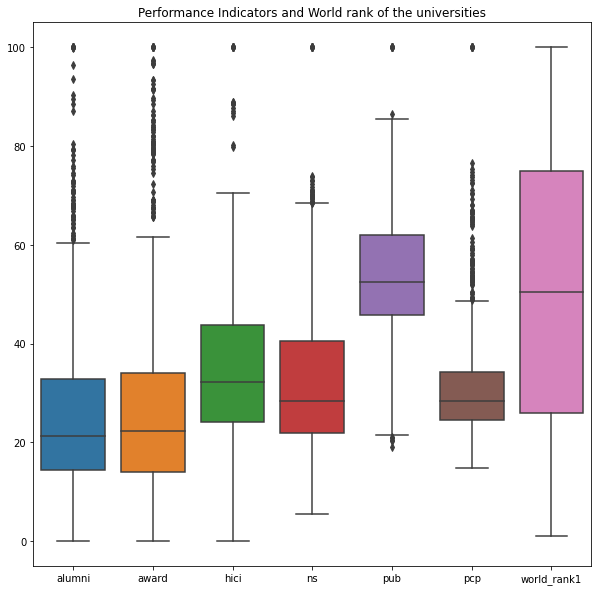

In [63]:
fig, ax = plt.subplots(figsize = (10,10)) # Observing the outliers of the Shanghai university ranking
chart = sns.boxplot(data= Shang_df100) # Ranks with range value were not considered in this step
plt.title("Performance Indicators and World rank of the universities")
plt.show()

From the above boxplot it seems like there are a lot of outliers. But these are actually not any experimental error. These might be very high or low scores earned by the universities. Hence, I have decided not to remove the outliers even though they can impact pearson's correlation. 

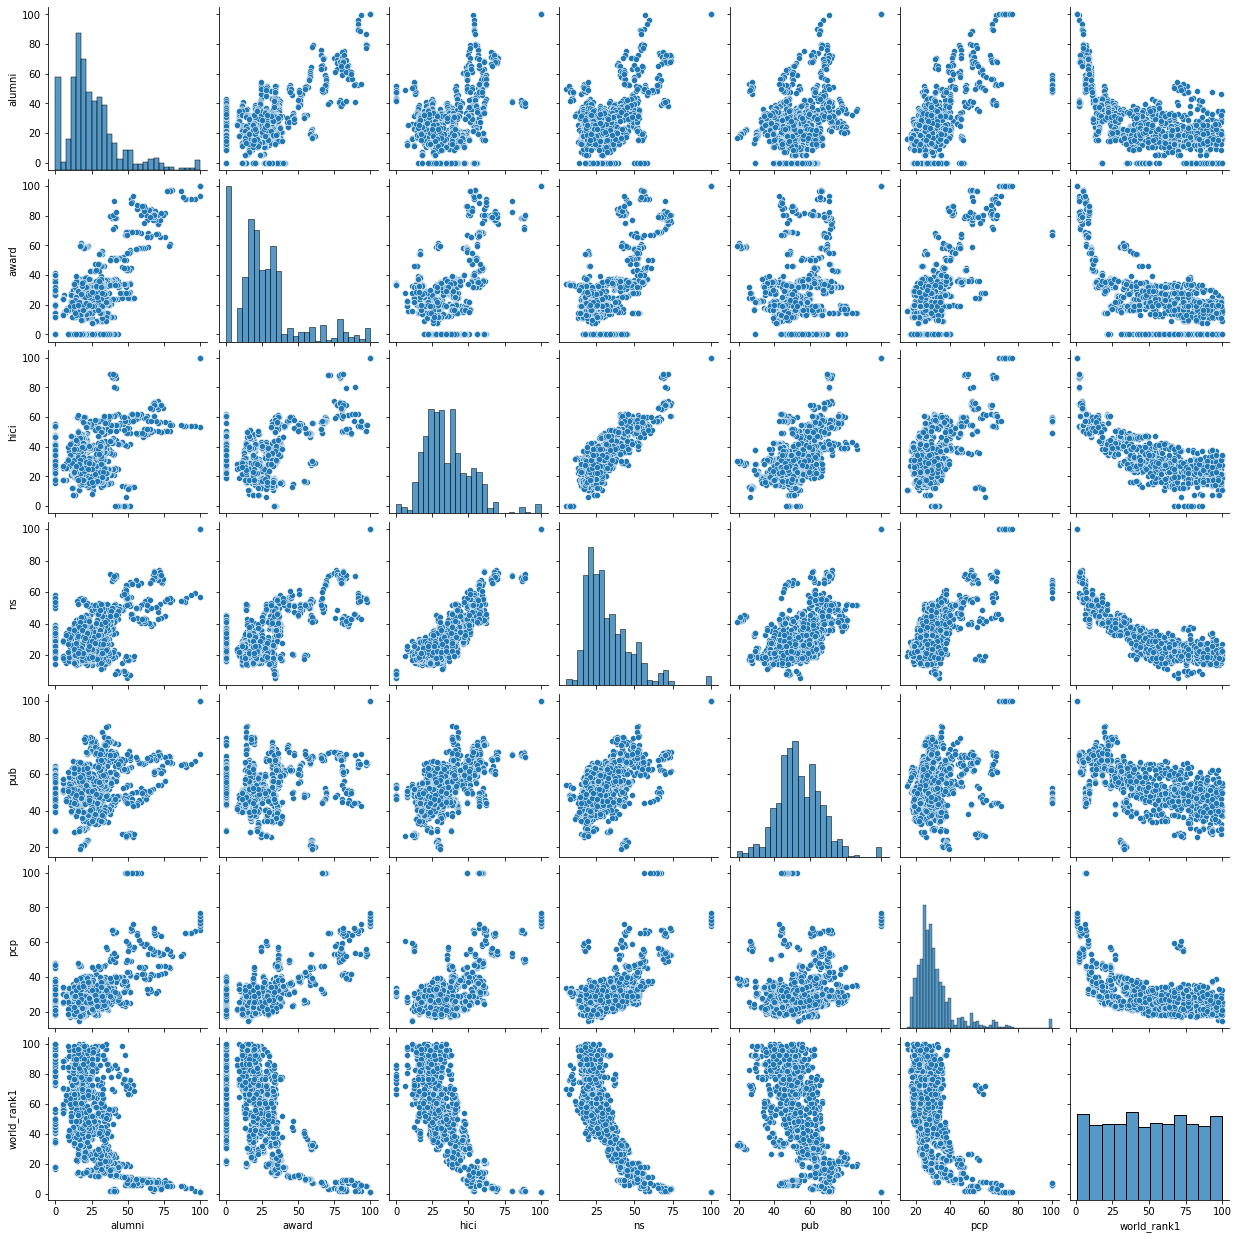

In [64]:
sns.pairplot(Shang_df100)

From the above pairwise plot it is visible that all the performance indicators are slightly linearly correlated to world rank.

In [65]:
Shang_df100_Corr = Shang_df100.corr() # Correlation matrix
Shang_df100_Corr

,alumni,award,hici,ns,pub,pcp,world_rank1
alumni,1.000000,0.745999,0.480494,0.584310,0.359647,0.639318,-0.572141
award,0.745999,1.000000,0.550183,0.671199,0.197078,0.718257,-0.670591
hici,0.480494,0.550183,1.000000,0.874655,0.659382,0.553548,-0.791032
ns,0.584310,0.671199,0.874655,1.000000,0.626028,0.674305,-0.819060
pub,0.359647,0.197078,0.659382,0.626028,1.000000,0.220892,-0.606051
pcp,0.639318,0.718257,0.553548,0.674305,0.220892,1.000000,-0.577886
world_rank1,-0.572141,-0.670591,-0.791032,-0.819060,-0.606051,-0.577886,1.000000


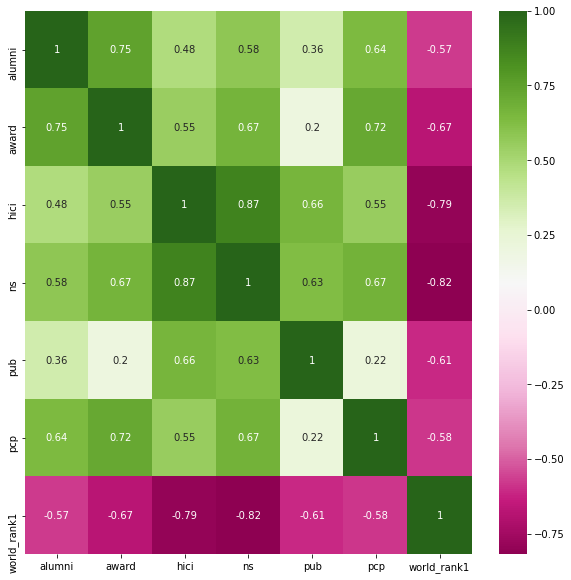

In [66]:
plt.subplots(figsize=(10,10))
Heat_map = sns.heatmap(Shang_df100_Corr, cmap="PiYG", annot=True) # Heatmap of correlation matrix
plt.show()

All the performance indicators are negatively correlated with world ranks. However, it is actually positively related. Because Rank 1 is the highest rank.
More or less, all the indicators are correlated with world rank. The three major compenents are - (1) Award - Staff of an institution winning Nobel Prizes and Fields Medals (2) HiCi - Highly Cited Researchers (3)N&S - Papers published in Nature and Science*

#### Out of the above 3 related components, 2 performance indicators are related to citations. This indicates that citation has a strong positive relationship on Shanghai world rankings.

Analyzing the correlation of performace indicators of THE ranking system.

In [67]:
times_df200

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,world_rank1,world_rank2
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011,1,-1
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011,2,-1
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011,3,-1
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011,4,-1
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,45.8,94.2,"7,929",8.4,27%,45 : 55,2011,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,"20,174",15.2,29%,50 : 50,2016,196,-1
1999,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,"2,958",13.4,17%,61 : 39,2016,196,-1
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,"16,841",43.2,8%,51 : 49,2016,198,-1
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,"27,756",14.8,17%,63 : 37,2016,199,-1


In [68]:
Timesdf200 = times_df200.copy()

In [69]:
times_df200.drop('world_rank', axis=1, inplace=True)

In [70]:
times_df200.drop('university_name', axis=1, inplace=True)

In [71]:
times_df200.drop('country', axis=1, inplace=True)

In [72]:
times_df200.drop('total_score', axis=1, inplace=True)

In [73]:
times_df200.drop('num_students', axis=1, inplace=True)

In [74]:
times_df200.drop('international_students', axis=1, inplace=True)

In [75]:
times_df200.drop('female_male_ratio', axis=1, inplace=True)

In [76]:
times_df200.drop('student_staff_ratio', axis=1, inplace=True)

In [77]:
times_df200.drop('world_rank2', axis=1, inplace=True)

In [78]:
times_df200

,teaching,international,research,citations,income,year,world_rank1
0,99.7,72.4,98.7,98.8,34.5,2011,1
1,97.7,54.6,98.0,99.9,83.7,2011,2
2,97.8,82.3,91.4,99.9,87.5,2011,3
3,98.3,29.5,98.1,99.2,64.3,2011,4
4,90.9,70.3,95.4,99.9,45.8,2011,5
...,...,...,...,...,...,...,...
1998,30.9,84.3,27.5,81.5,34.7,2016,196
1999,25.6,69.5,18.1,100.0,37.7,2016,196
2000,30.8,55.9,27.4,87.7,47.1,2016,198
2001,30.5,64.9,22.9,91.0,29.0,2016,199


In [79]:
times_df_200 = times_df200[['teaching', 'international', 'research', 'citations','income', 'world_rank1']].copy()

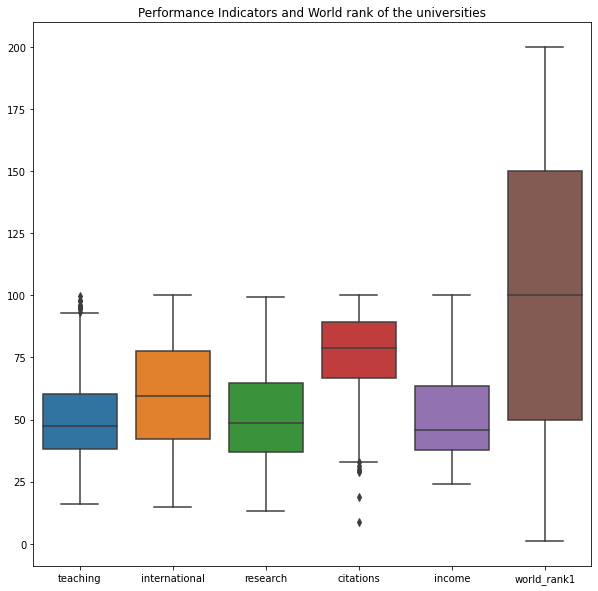

In [80]:
fig, ax = plt.subplots(figsize = (10,10)) # Observing the outliers of the THE university ranking
chart = sns.boxplot(data= times_df_200)# Ranks with range value were not considered in this step
plt.title("Performance Indicators and World rank of the universities")
plt.show()

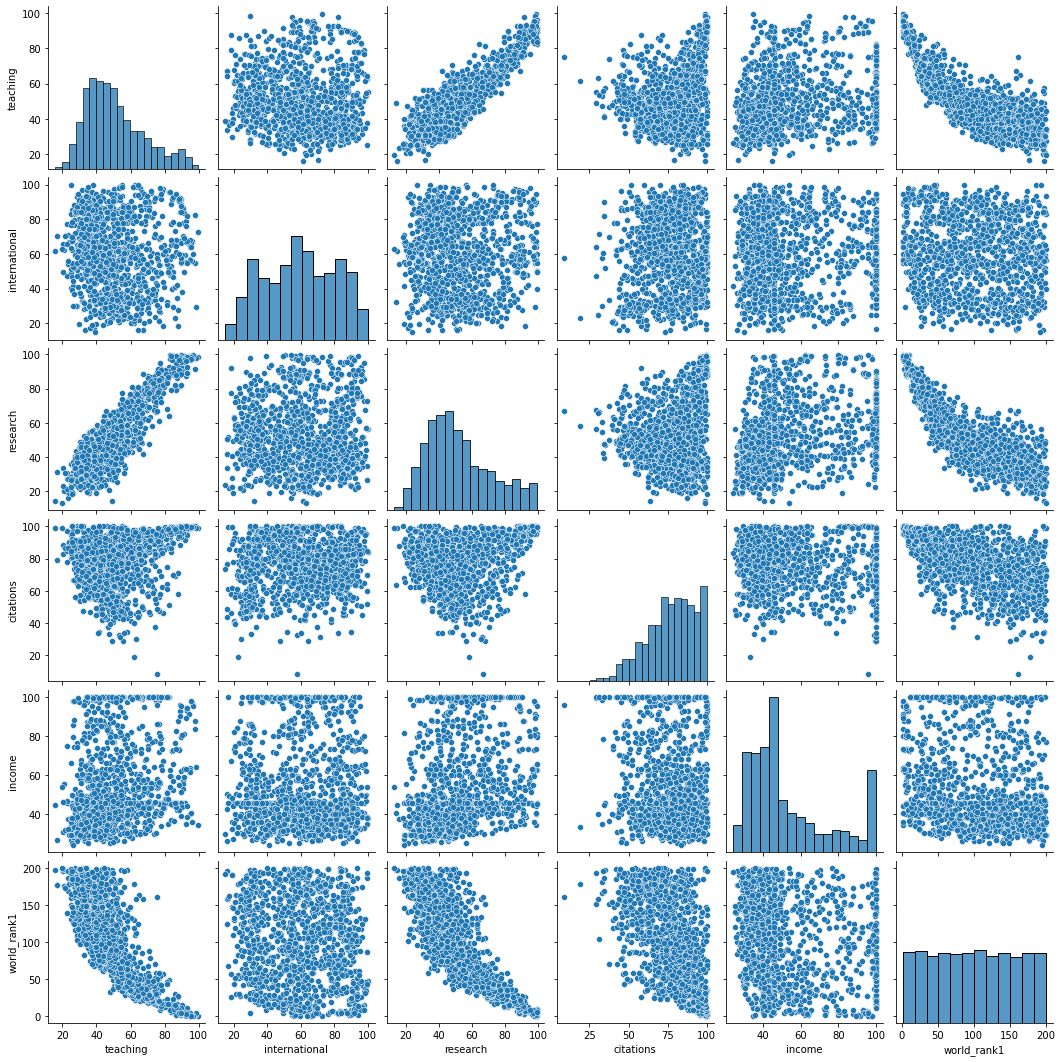

In [81]:
sns.pairplot(times_df_200)

In [82]:
times_df200_corr = times_df_200.corr()
times_df200_corr

,teaching,international,research,citations,income,world_rank1
teaching,1.000000,-0.075302,0.892144,0.221300,0.224939,-0.807394
international,-0.075302,1.000000,0.029109,0.067093,-0.004810,-0.094255
research,0.892144,0.029109,1.000000,0.190185,0.275857,-0.831215
citations,0.221300,0.067093,0.190185,1.000000,-0.145588,-0.515432
income,0.224939,-0.004810,0.275857,-0.145588,1.000000,-0.202343
world_rank1,-0.807394,-0.094255,-0.831215,-0.515432,-0.202343,1.000000


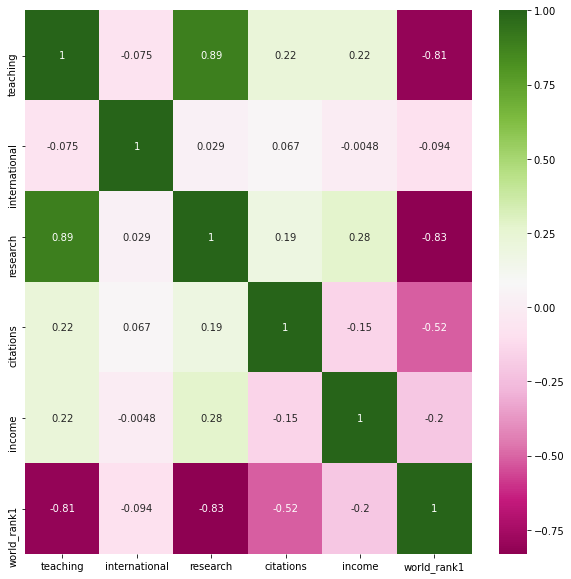

In [83]:
plt.subplots(figsize=(10,10))
Heat_map = sns.heatmap(times_df200_corr, cmap="PiYG", annot=True)
plt.show()

#### Conclusions from the above correlation matrix is that teaching and research are highly correlated with each other and have a strong positive relationship with THE university rankings.

#### The correlation matrix gave a clear picture of how strongly citation influences Shanghai ranking system but not THE ranking system.

### Q3. Which ranking system can be argued to have adapted fair methodology?

The Shanghai ranking system is biased towards research and citation and leaves behind other major components like international engagement, the teacher-student ratio which in turn makes THE University Ranking more reliable.

### Q4. Can universities use these indicators to predict their rankings?

Based on diverse component consideration, I decided to construct a predictive model using THE University dataset.

##### Assumption 1: Linearity - The relationship between independent and the mean of dependent variable is linear

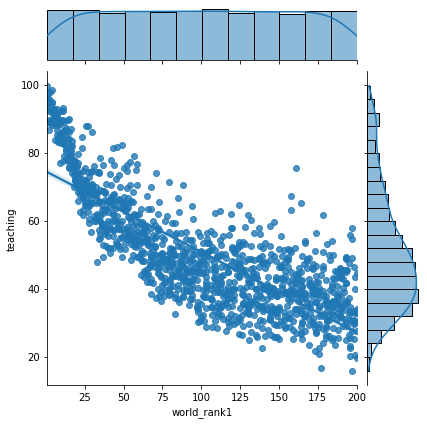

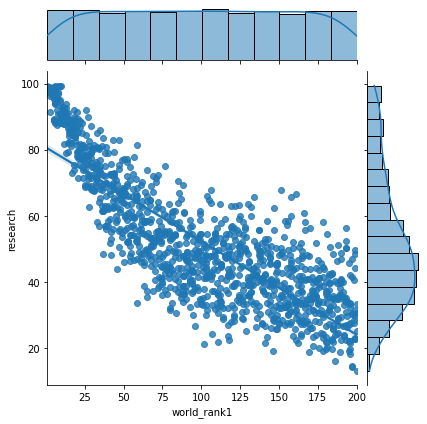

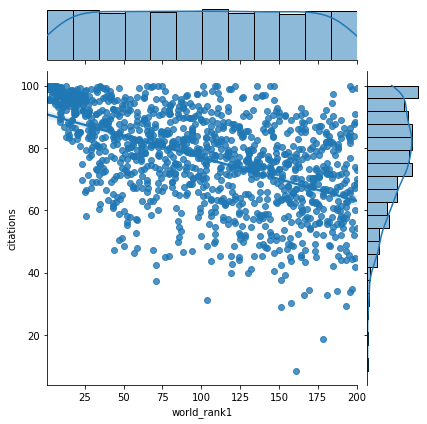

In [84]:
sns.jointplot(data=times_df200, x="world_rank1", y="teaching", kind = "reg")
sns.jointplot(data=times_df200, x="world_rank1", y="research", kind = "reg")
sns.jointplot(data=times_df200, x="world_rank1", y="citations", kind = "reg")

Pearson's correlation assumes linearity in the data. Here, since I can observe a small curve, I wanted to check if the non linearity is more than linearity. So, I tried to obtain both Pearson and Spearman's correlation coefficient.

In [85]:
corrPearson, pValPearson = stats.pearsonr(times_df200['world_rank1'],times_df200['research']) # Source code: lab feedback
print ("Pearson's correlation is", corrPearson, "with a p-value of",pValPearson)

Pearson's correlation is -0.8312147576985353 with a p-value of 5.517964139670494e-308


In [86]:
corrSpearman, pValSpearman = stats.spearmanr(times_df200['world_rank1'],times_df200['research']) # Source code: lab feedback
print ("Spearman's correlation is", corrSpearman, "with a p-value of",pValSpearman)

Spearman's correlation is -0.8178589249063366 with a p-value of 4.68211545035474e-290


The lower p value indicates that the observation is significant. Also, Pearson's correlation is slightly high. So, I have decided to go ahead with Multiple Linear Regression for prediction.

##### Assumption 2: The independent variables are independent of each other.

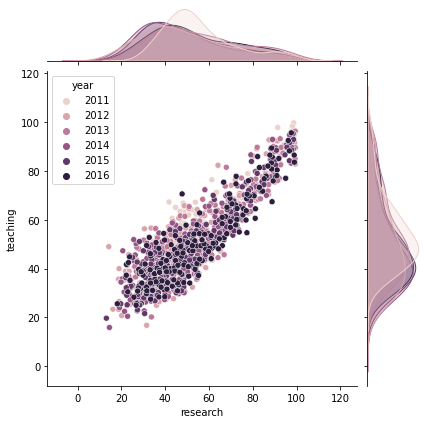

In [87]:
sns.jointplot(data=times_df200, x="research", y="teaching", hue = "year")

Both indicators - teaching and research are highly correlated with the value of 0.89. Since, multicollinearity affects a prediction model, I have decided to keep research (as it has higher correlation coefficient with world rank) and discard teaching.

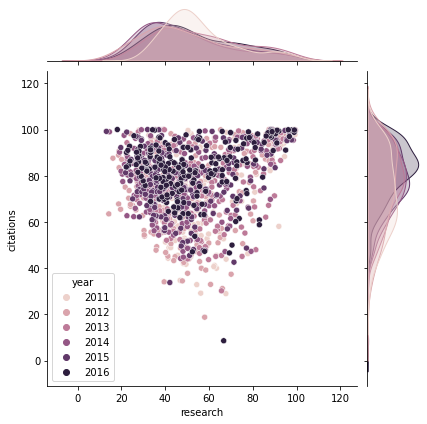

In [88]:
sns.jointplot(data=times_df200, x="research", y="citations", hue = "year")

Research and citatations are not correlated with - 0.19 value and both have a positive relation with world rank with correlation values as research vs world rank = 0.83 and citations vs world rank = 0.52. The minus sign is ingored because in ranking - 1 is considered highest and in scores - 100 is considered highest. So, there is positive correlation among the variables.

This brings me to a conclusion that research and citations would be two best independent variables to create a predictive model.

##### Assumption 3: The dependent and independent variables have normal distribution

#### Checking the distribution of THE data especially the two performance indicators - research and citations

Sturge's Formula - k = log (n) with base 2 + 1, is used to identify the appropriate bins for the histogram of all the columns. Here, n = 1201 and as per the below screenshot the value of log is 10 and plus 1 gives the value of k as 11.

![](Sturgesformula.png)

array([[<AxesSubplot:title={'center':'teaching'}>,
        <AxesSubplot:title={'center':'international'}>],
       [<AxesSubplot:title={'center':'research'}>,
        <AxesSubplot:title={'center':'citations'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'world_rank1'}>]], dtype=object)

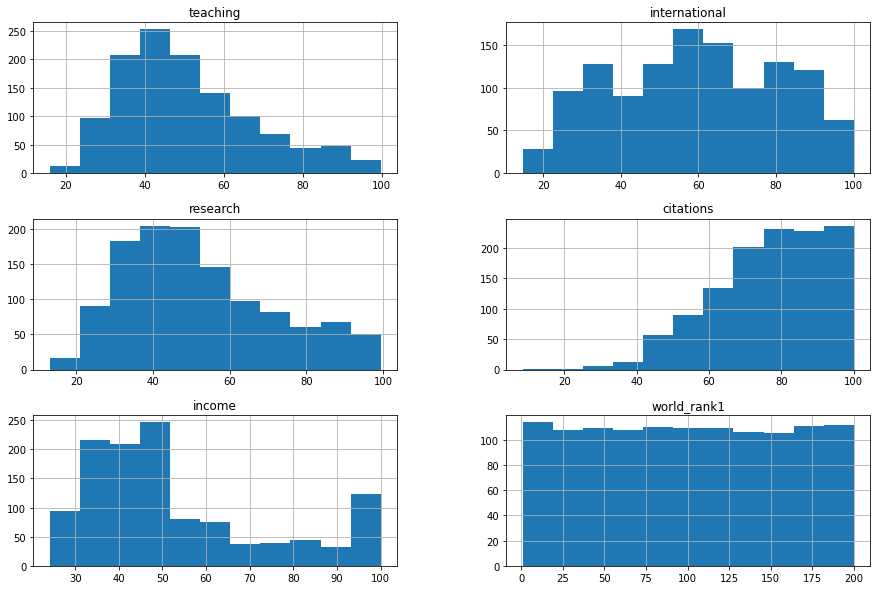

In [89]:
times_df_200.hist(bins=11, figsize=(15, 10))

##### As per the official site of THE university ranking, for all indicators except the Academic Reputation Survey, the cumulative probability function are calculated using a version of Z-scoring. Link: https://www.timeshighereducation.com/news/ranking-methodology-2016

Checking if - research, citations and world_rank have normal distributions.

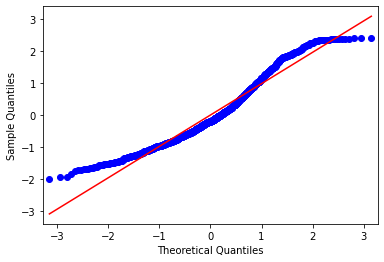

In [90]:
import statsmodels.api as sm
#This contains theoretical distributions
from scipy import stats

# Q-Q plot of the quantiles of "research" versus the quantiles/ppf of a distribution.
sm.qqplot(times_df_200['research'], dist=stats.norm, fit=True, line = 'r')
plt.show()

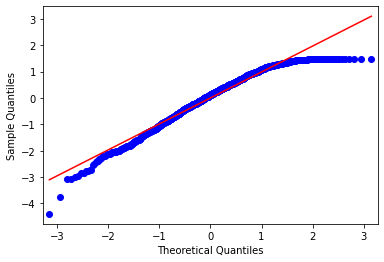

In [91]:
sm.qqplot(times_df_200['citations'], dist=stats.norm, fit=True, line = 'r') 
# Q-Q plot of the quantiles of "citations" versus the quantiles/ppf of a distribution.
plt.show()

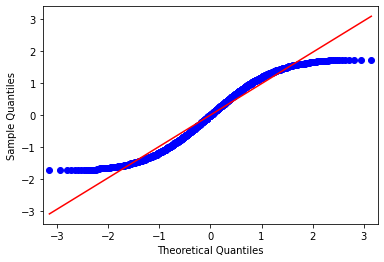

In [92]:
sm.qqplot(times_df_200['world_rank1'], dist=stats.norm, fit=True, line = 'r') 
# Q-Q plot of the quantiles of "world rank" versus the quantiles/ppf of a distribution.
plt.show()

Although, all the columns are already standardized using z score by THE University rank, I picked world rank column to check if standardization or log normalization would improve it or not.

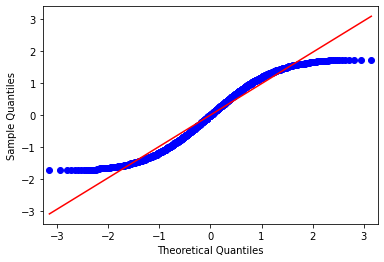

In [93]:
zScoreNormalised=(times_df_200['world_rank1']-times_df_200['world_rank1'].mean())/times_df_200['world_rank1'].std()
sm.qqplot(zScoreNormalised, dist=stats.norm, fit=True, line = 'r') # Using z score
plt.show()

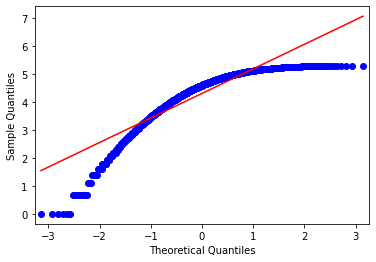

In [94]:
lognormal=times_df_200['world_rank1'].apply(np.log)
fig = sm.qqplot(lognormal, stats.norm, line = 'r') # using log normalization
plt.show()

Either doesn't improve the distribution any better.

In [95]:
x = times_df_200[['research', 'citations']]
x

,research,citations
0,98.7,98.8
1,98.0,99.9
2,91.4,99.9
3,98.1,99.2
4,95.4,99.9
...,...,...
1998,27.5,81.5
1999,18.1,100.0
2000,27.4,87.7
2001,22.9,91.0


In [96]:
y = times_df_200[['world_rank1']]
y

,world_rank1
0,1
1,2
2,3
3,4
4,5
...,...
1998,196
1999,196
2000,198
2001,199


Splitting the data to 80-20% for training and testing.

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y ,test_size =0.2, random_state = 10) 
y_test

,world_rank1
123,124
1882,80
1837,35
628,27
1165,164
...,...
1048,47
605,4
722,121
1510,109


In [98]:
df2=pd.DataFrame(x_train,columns=['research','citations'])
Y = y_train['world_rank1']
df2['world_rank1']=pd.Series(Y)
df2

,research,citations,world_rank1
1807,88.6,99.7,5
1843,72.7,86.0,41
1848,69.7,92.2,46
1511,51.9,61.1,109
30,75.1,85.0,30
...,...,...,...
1135,38.9,74.6,132
1982,39.8,81.8,180
1949,40.0,83.8,146
729,56.5,51.5,128


#### OLS - using statsmodels package

In [99]:
import statsmodels.formula.api as smf
model = smf.ols(formula='world_rank1 ~ research + citations', data=df2)

In [100]:
# Fitting the model
results = model.fit()
# Printing the summary page
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            world_rank1   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2128.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:19:13   Log-Likelihood:                -4437.9
No. Observations:                 960   AIC:                             8882.
Df Residuals:                     957   BIC:                             8896.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.0315      4.294     75.002      0.0

In [101]:
print(results.params) # printing the parameters

Intercept    322.031481
research      -2.225246
citations     -1.375582
dtype: float64


Null Hypothesis : all coefficients in the model are equal to zero.
Alternative hypothesis: not every coefficient is simultaneously equal to zero.
Observations: R-squared and Adjusted R-squared are same 0.81 indicates a good fit.
P value is zero i.e. below 0.05 and f statistics is very large. Also, the t values are high. Hence, I have rejected null hypothesis.

In [102]:
#Calculating dependent variable values from parameters directly using test data set
OLSDirectTest  = x_test['citations']*results.params['citations'] + x_test['research']*results.params['research'] + results.params.Intercept

In [103]:
#Calculating dependent variable values from the predict method
OLSPredict  = results.predict()

In [104]:
len(OLSPredict)

960

In [105]:
len(OLSDirectTest)

241

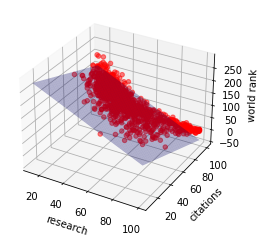

In [106]:
# Source code - https://www.youtube.com/watch?v=fJOhLKvWOJI
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(df2.research.min(), df2.research.max(), 100),np.linspace(df2.citations.min(), 
                                                                                                  df2.citations.max(), 100))
onlyX = pd.DataFrame({'research': x_surf.ravel(), 'citations': y_surf.ravel()})
fittedY=results.predict(exog=onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)

# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['research'],df2['citations'],df2['world_rank1'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('research')
ax.set_ylabel('citations')
ax.set_zlabel('world rank')
plt.show()

In [107]:
residualshat =results.resid

C:\Users\nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

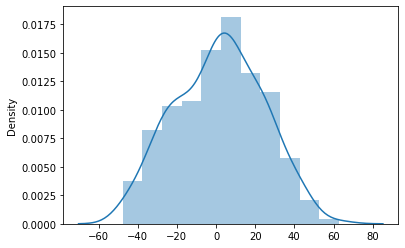

In [108]:
sns.distplot ((y_test['world_rank1']-OLSDirectTest)) # Checking the residual distribution after predicting the test data

C:\Users\nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

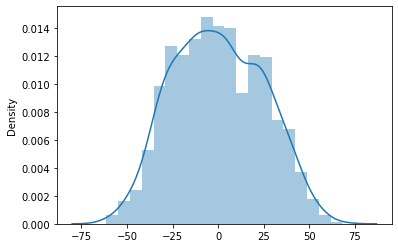

In [109]:
sns.distplot (residualshat, 20) # Checking the residual distribution

C:\Users\nazia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='world_rank1', ylabel='Density'>

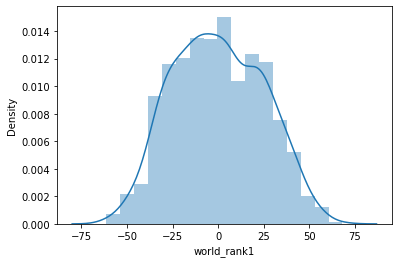

In [110]:
sns.distplot ((y_train['world_rank1']-OLSPredict)) # Checking the residual distribution using the train data

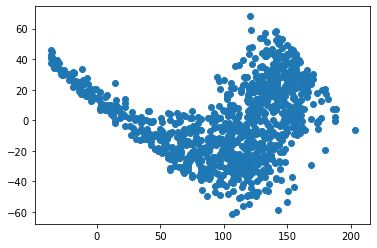

In [111]:
plt.scatter(OLSPredict, residualshat)

Looks like heteroscadisticity is present!

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [112]:
# Source code - https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression
import statsmodels.stats.api as sms  
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residualshat, x_train)
lzip(name, test)

[('F statistic', 0.9275675997843), ('p-value', 0.794295504061299)]

In [113]:
len(residualshat)

960

I decided to not go ahead futher and evaluate or validate the model as it didn't satisfy the assumption of homoscedasticity

#### Future WorK - To handle heteroscedastic and try to create a better predictive model. 